In [177]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError,categorical_crossentropy
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE


In [178]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\heart_failure_clinical_records_dataset.csv"
df=pd.read_csv(path)

In [179]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [180]:
df.isna().sum().sort_values(ascending=False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [181]:
df.duplicated().sum()

0

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [183]:
df['age']=df['age'].astype(int)

In [184]:
# Split features and target
X = df.drop(columns=['DEATH_EVENT'])  # Features
y = df['DEATH_EVENT']  # Target variable

In [185]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [186]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

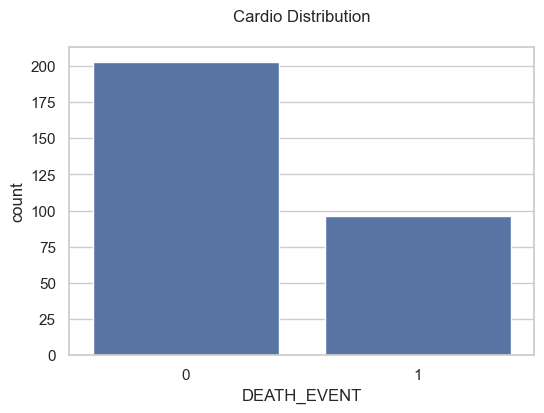

In [187]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Cardio Distribution\n')
plt.show()

In [188]:
print(df['DEATH_EVENT'].value_counts())
print(df['DEATH_EVENT'].value_counts(normalize=True))  # Shows percentages

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


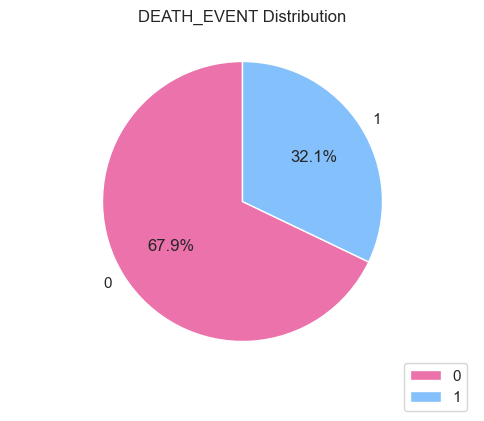

In [189]:
revenue_counts = df['DEATH_EVENT'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('DEATH_EVENT Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

In [190]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

df = pd.DataFrame(X_train, columns=X.columns)
df['DEATH_EVENT'] = y_train

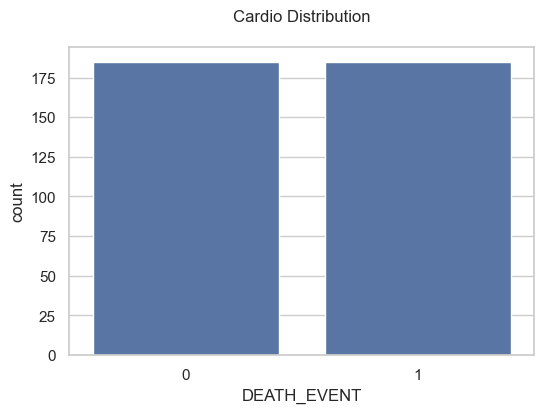

In [191]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Cardio Distribution\n')
plt.show()

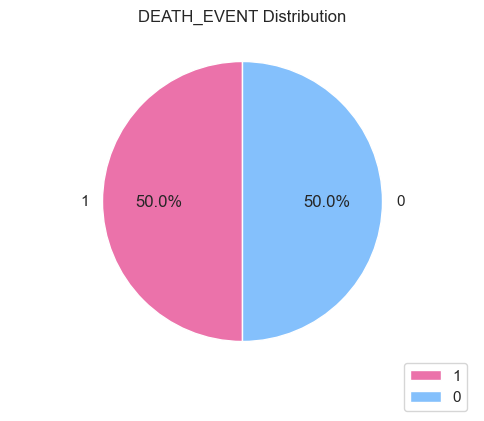

In [192]:
revenue_counts = df['DEATH_EVENT'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('DEATH_EVENT Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

In [193]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(X_train.shape[1],)),
        
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        Dense(64, activation='relu'),
        Dense(64, activation='relu'),

        Dense(32, activation='relu'),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [194]:
model=build_model()
model.summary()

c:\Users\mrtat\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,705 (127.75 KB)

 Trainable params: 32,705 (127.75 KB)

 Non-trainable params: 0 (0.00 B)

In [195]:
print("\nTraining the model...")
history = model.fit(X_train, y_train,
                    epochs=27,  
                    batch_size=32,
                    validation_split=0.2,# Use 20% of training data for validation
                    callbacks=[
                        EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),

                    ]

                    ) 


Training the model...
Epoch 1/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5965 - loss: 0.6871 - val_accuracy: 0.7027 - val_loss: 0.6670
Epoch 2/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8252 - loss: 0.6155 - val_accuracy: 0.7838 - val_loss: 0.5785
Epoch 3/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8456 - loss: 0.4896 - val_accuracy: 0.7973 - val_loss: 0.5031
Epoch 4/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8629 - loss: 0.3569 - val_accuracy: 0.8649 - val_loss: 0.3262
Epoch 5/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8830 - loss: 0.3106 - val_accuracy: 0.8649 - val_loss: 0.3733
Epoch 6/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8599 - loss: 0.3480 - val_accuracy: 0.9459 - val_loss: 0.2742
Epoch 7/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8801 - loss: 0.2817 - val_accuracy: 0.9459 - val_loss: 0.2371
Epoch 8/27
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.2244 - val_accu

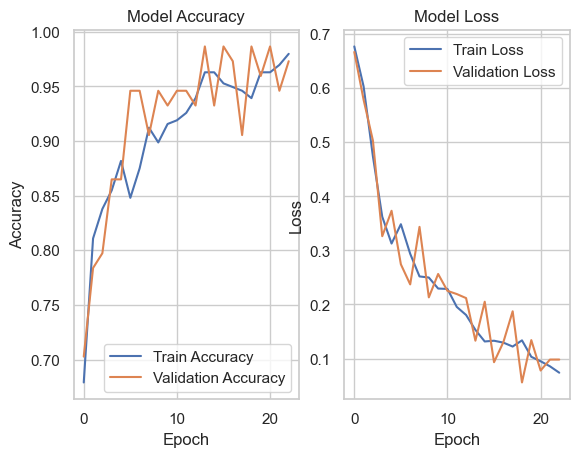

In [196]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Text(0.5, 1.0, 'Confusion Matrix for Heart Failure Prediction')

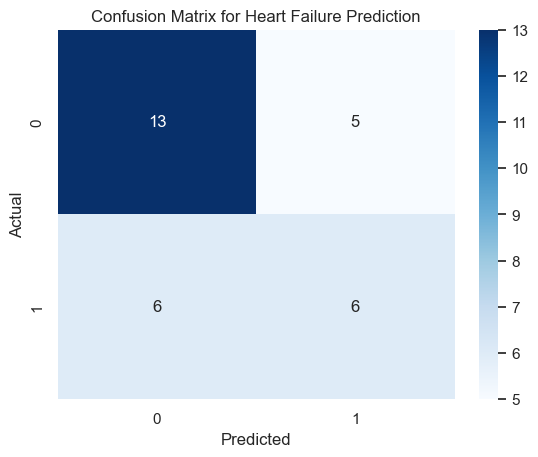

In [197]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Heart Failure Prediction")

In [198]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.55      0.50      0.52        12

    accuracy                           0.63        30
   macro avg       0.61      0.61      0.61        30
weighted avg       0.63      0.63      0.63        30

